# Анализ рекламных источников мобильной игры

# Описание проекта

Необходимо проанализировать рекламные источники в мобильной игре и поведение игроков в зависимости от источника перехода.


# Описание данных

Основной датасет содержит данные о событиях, совершенных в мобильной игре
«Космические братья». В датасете содержатся данные первых пользователей приложения — когорты
пользователей, которые начали пользоваться приложением в период с 4 по 10 мая
включительно.

**/datasets/game_actions.csv** :

event_datetime — время события;

event — одно из трёх событий:

1. building — объект построен,
2. finished_stage_1 — первый уровень завершён,
3. project — проект завершён;

building_type — один из трёх типов здания:
1. assembly_shop — сборочный цех,
2. spaceport — космопорт,
3. research_center — исследовательский центр;

user_id — идентификатор пользователя;

project_type — тип реализованного проекта;


**/datasets/ad_costs.csv** :

day - день, в который был совершен клик по объявлению

source - источник трафика

cost - стоимость кликов

**/datasets/user_source.csv**:

user_id - идентификатор пользователя

source - источников, с которого пришёл пользователь, установивший
приложение

## Загрузка необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import levene

## Загрузка данных

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')

In [3]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [4]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [5]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [6]:
source = pd.read_csv('/datasets/user_source.csv')

In [7]:
source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


## Ознакомление с данными

In [8]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [9]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [10]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [11]:
ad_costs.head(28)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [12]:
source.head(10)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


In [13]:
game_actions

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


## Предобработка данных

In [14]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [15]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [16]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [17]:
game_actions.duplicated().sum()

1

In [18]:
game_actions[game_actions.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [19]:
game_actions = game_actions.drop_duplicates()

In [20]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


In [21]:
game_actions.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133773
dtype: int64

In [22]:
game_actions['building_type'].describe()

count        127956
unique            3
top       spaceport
freq          59325
Name: building_type, dtype: object

In [23]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [24]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [25]:
game_actions[game_actions['building_type'].notna()]

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135627,2020-06-04 05:18:54,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135631,2020-06-04 13:26:25,building,research_center,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135634,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [26]:
game_actions[game_actions['building_type'].isna()]
#game_actions[game_actions['building_type'].isna()].tail()

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


**Промежуточный вывод**: После ознакомления с данными было принято решение не обрабатывать пропускив столбце 'building_type', чтобы не искажать резульатты исследования. 


In [27]:
game_actions['project_type'].notna().sum()

1866

In [28]:
game_actions[game_actions['project_type'].notna()]

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135602,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [29]:
game_actions[game_actions['project_type'].isna()]

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [30]:
game_actions[game_actions['user_id'] == 'ffff69cc-fec1-4fd3-9f98-93be1112a6b8']

,event_datetime,event,building_type,user_id,project_type
41421,2020-05-08 06:57:30,building,assembly_shop,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
53164,2020-05-09 06:00:38,building,assembly_shop,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
61421,2020-05-09 20:56:03,building,assembly_shop,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
80849,2020-05-11 07:09:49,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
98034,2020-05-13 10:59:39,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
111199,2020-05-15 08:36:25,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
115943,2020-05-16 04:29:30,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
117542,2020-05-16 11:39:58,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
123797,2020-05-17 22:48:25,building,research_center,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN
133483,2020-05-23 06:00:10,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN


**Промежуточный вывод**: В процессе изучения данных было принято решение не обрабатывать пропуски в столбце 'project_type'. Пропущенные значения могу свидетельсоввть о простом отсутсвие проекта у игрок, иными словами, игрок закончил уровень не с помощью проекта.

In [31]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [32]:
ad_costs.isna().sum()

source    0
day       0
cost      0
dtype: int64

In [33]:
ad_costs.duplicated().sum()

0

In [34]:
ad_costs['day'].describe()

count             28
unique             7
top       2020-05-04
freq               4
Name: day, dtype: object

In [35]:
ad_costs['day'] = ad_costs['day'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [36]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


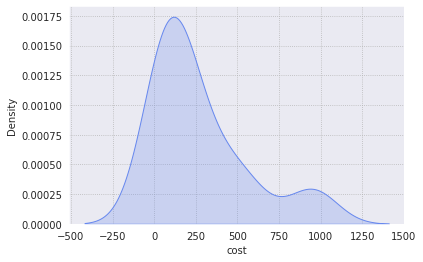

In [37]:
sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
sns.kdeplot(ad_costs['cost'], shade=True, color=sns.set_palette('coolwarm'));

In [38]:
ad_costs['cost'].describe()

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64

In [39]:
ad_costs['cost'] = ad_costs['cost'].round(2)

In [40]:
ad_costs['cost'].head()

0    935.88
1    548.35
2    260.19
3    177.98
4    111.77
Name: cost, dtype: float64

In [41]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [42]:
source.duplicated().sum()

0

In [43]:
source.isna().sum()

user_id    0
source     0
dtype: int64

**Промежуточный вывод:** В ходе операций с данными были изменены типы данных в необходимых местах датафреймов. В основном это касалось дат.

## Исследовательский анализ

### Анализ активностей пользователей

In [44]:
game_actions['user_id'].nunique()

13576

In [45]:
source['user_id'].nunique()

13576

**Промежуточный вывод**: Всего есть информация о 13576 уникальных игроков.

In [46]:
game = game_actions.copy()

In [47]:
finish_stage1 = game[game['event'] == 'finished_stage_1']

In [48]:
finish_stage1['user_id'].count()
#finish_stage1['user_id'].nunique()

5817

**Промежуточный вывод**: Первый уровень завершили 5817 игроков.

In [49]:
game_actions['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

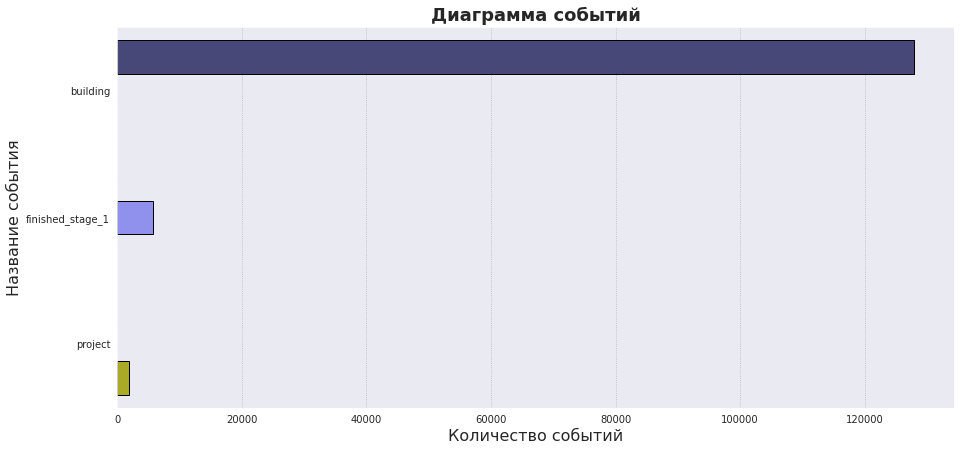

In [50]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_palette('gist_stern', 3)
ax = sns.countplot(y='event', hue='event', data=game_actions, ec='black')
ax.legend_.remove()
ax.set_title('Диаграмма событий', fontsize=18, fontweight='bold')
ax.set_ylabel('Название события', fontsize=16)
ax.set_xlabel('Количество cобытий', fontsize=16);

**Промежуточный вывод**: В результате анализа установлено: первый уровень завершили 5817 игроков. Из графика видно, что событие 'building' самое большое количество игроков, вполне очевидно.

Событие 'project' имеет самый маленький показатель по количеству игроков.

In [51]:
game['event_datetime'].min()

Timestamp('2020-05-04 00:00:01')

In [52]:
game['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

**Промежуточный вывод**: Минимальная дата по совершению события - 4 мая, максимальная - 5 июня.

In [53]:
ad_costs['day'].min()

Timestamp('2020-05-03 00:00:00')

In [54]:
ad_costs['day'].max()

Timestamp('2020-05-09 00:00:00')

**Промежуточный вывод:** Дни кликов располагаются с 3 мая по 9 мая.

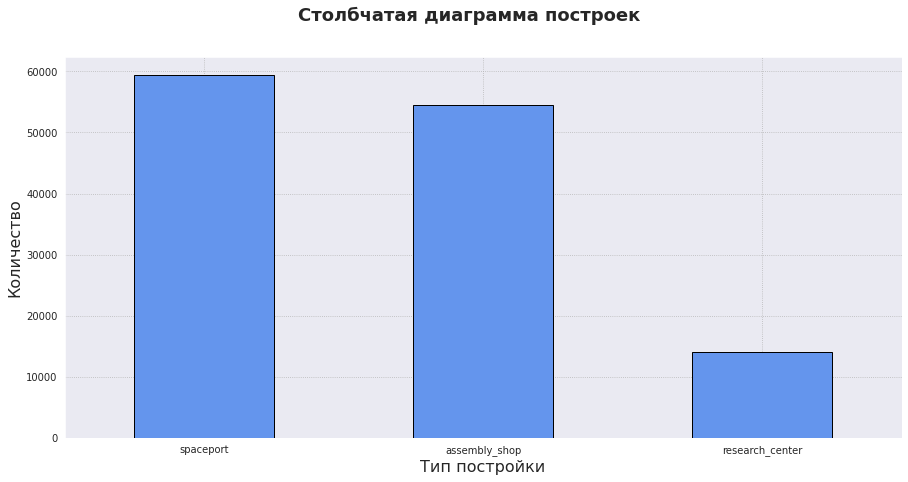

In [55]:
game_actions['building_type'].value_counts().to_frame().plot(
    kind='bar',
    ec='black',
    figsize=(15, 7),
    legend='',
    color='cornflowerblue'
);
plt.xlabel('Тип постройки', fontsize=16)
plt.ylabel('Количество', fontsize=16)
plt.xticks(rotation=0)
plt.suptitle('Столбчатая диаграмма построек', fontsize=18, fontweight='bold');

In [56]:
gg = game['building_type'].value_counts()

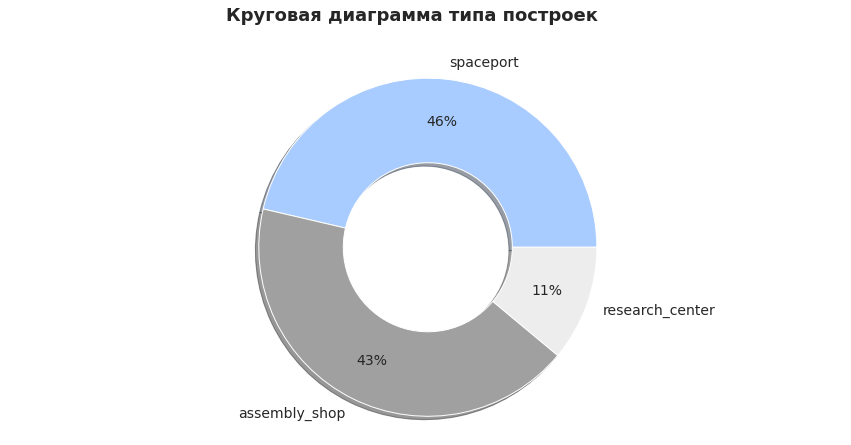

In [57]:
fig, ax = plt.subplots(figsize=(15, 7))
gg.plot(
    kind='pie',
    subplots=True,
    autopct='%1.f%%',
    colors=['#a8ccff', '#a0a0a0', '#ededed'],
    fontsize=14,
    shadow=True,
    wedgeprops=dict(width=0.5),
    ylabel='',
    pctdistance=0.75,
)
ax.axis('equal');
plt.suptitle('Круговая диаграмма типа построек', fontsize=18, fontweight='bold');

In [58]:
game_actions['building_type'].value_counts().to_frame()

,building_type
spaceport,59325
assembly_shop,54494
research_center,14137


**Промежуточный вывод:** Из графиков видно, что самый распространенный вид построек - **'spaceport'**. **'research_center'** имеет меньше всего построек.

### Анализ рекламных источников

In [59]:
source1 = source.groupby('source')['user_id'].count().to_frame().sort_values(by='user_id', ascending=False)
source1

,user_id
source,
yandex_direct,4817
instagram_new_adverts,3347
facebook_ads,2726
youtube_channel_reklama,2686


In [60]:
source1['user_id'].sum()

13576

**Промежуточный вывод**: Всего 13576 привлеченных игроков из 4-х источников.

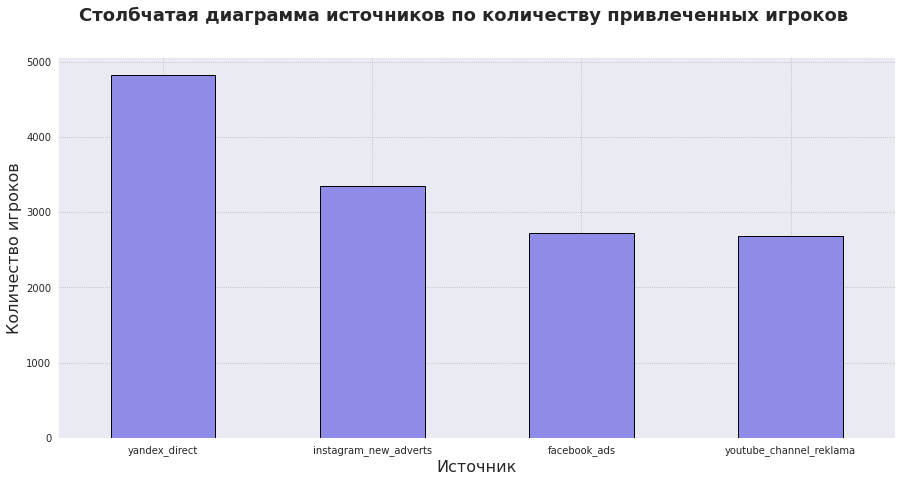

In [61]:
source1.sort_values(by='user_id', ascending=False).plot(
    kind='bar',
    ec='black',
    legend='',
    color='#8f8ce7',
    figsize=(15, 7)
)
plt.xlabel('Источник', fontsize=16)
plt.ylabel('Количество игроков', fontsize=16)
plt.xticks(rotation=0)
plt.suptitle('Столбчатая диаграмма источников по количеству привлеченных игроков', fontsize=18, fontweight='bold');

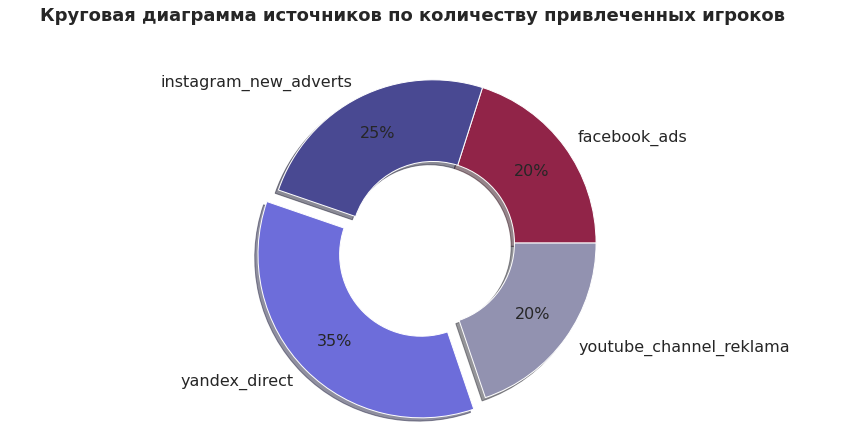

In [62]:
sns.set_palette('gist_stern')
explode=[0, 0, 0.1, 0]
source.groupby('source')['user_id'].count().plot(
    kind='pie', 
    subplots=True,
    shadow=True,
    figsize=(15, 7),
    ylabel='',
    autopct='%1.f%%',
    fontsize=16,
    wedgeprops=dict(width=0.5),
    pctdistance=0.75,
    explode=explode,
)
plt.axis('equal')
plt.suptitle('Круговая диаграмма источников по количеству привлеченных игроков', fontsize=18, fontweight='bold');

**Промежуточный вывод**: Из графика видно, что самый большой показатель количества игроков имеет **yandex_direct**. Далее идет **Instagram**

In [63]:
ad_costs.describe()

,cost
count,28.000000
mean,271.556071
std,286.866655
min,23.310000
25%,66.747500
50%,160.055000
75%,349.032500
max,969.140000


In [64]:
_sorted = ad_costs.sort_values(by='cost', ascending=False)
_max = _sorted.iloc[0]
_min = _sorted.iloc[-1]

In [65]:
_max

source          yandex_direct
day       2020-05-03 00:00:00
cost                   969.14
Name: 14, dtype: object

In [66]:
_min

source    youtube_channel_reklama
day           2020-05-09 00:00:00
cost                        23.31
Name: 27, dtype: object

**Промежуточный вывод**: Самый высокий одиночный показатель у **yandex_irect - 969.14**, самый низкий показатель у **youtube_channel_reklama - 23.31**

Рассмотрим общие показатели цены за клик по источникам.

In [67]:
ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).to_frame()

,cost
source,
yandex_direct,2233.11
instagram_new_adverts,2161.45
facebook_ads,2140.90
youtube_channel_reklama,1068.11


In [68]:
piv = ad_costs.pivot_table(columns='source', values='cost', aggfunc='sum')

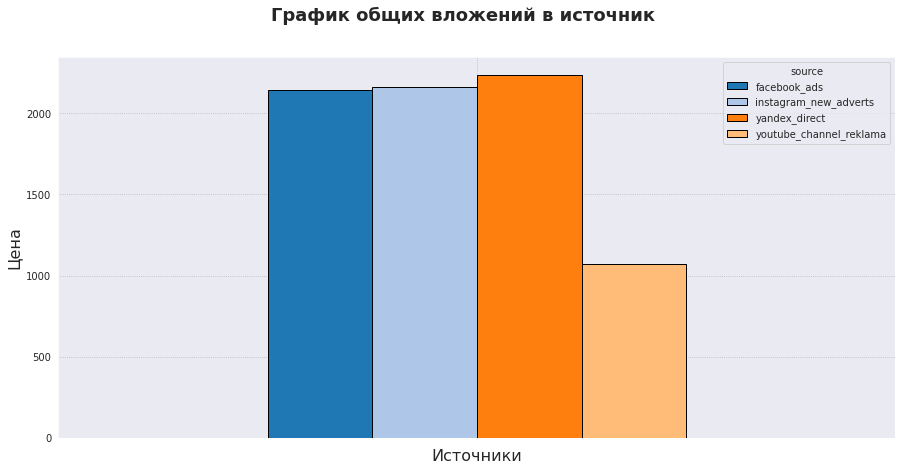

In [69]:
sns.set_palette('tab20')
ax = piv.plot(kind='bar', figsize=(15, 7), ec='black')
ax.set_xticklabels([])
plt.suptitle('График общих вложений в источник', fontsize=18, fontweight='bold')
plt.xlabel('Источники', fontsize=16)
plt.ylabel('Цена', fontsize=16);

In [70]:
ad_costs.groupby('source')['cost'].sum().to_frame().sort_values(by='cost', ascending=False)

,cost
source,
yandex_direct,2233.11
instagram_new_adverts,2161.45
facebook_ads,2140.90
youtube_channel_reklama,1068.11


**Промежуточный вывод**: В ходе операций было установлено, что **yandex_direct** имеет самый высокий показатель сумарных вложений канала. Остальные каналы не очень сильно отличаются от Яндекса, за исключением **youtube_channel_reklama**. Он имеет самые низкие показатели.

In [71]:
game_actions

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [72]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77
5,facebook_ads,2020-05-08,68.01
6,facebook_ads,2020-05-09,38.72
7,instagram_new_adverts,2020-05-03,943.20
8,instagram_new_adverts,2020-05-04,502.93
9,instagram_new_adverts,2020-05-05,313.97


In [73]:
source

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [74]:
game_act_un = (
    game_actions.sort_values(by=['user_id', 'event_datetime'])
    .groupby('user_id')
    .agg(
        {
            'event_datetime': 'first',
            'user_id': 'nunique',
            'event': 'last',
            'building_type': 'count'
        }
    ).rename(columns={'user_id': 'unique_us'}).reset_index()
)

In [75]:
game_act_un

,user_id,event_datetime,unique_us,event,building_type
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,1,building,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,1,building,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,1,building,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,1,finished_stage_1,8
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,1,building,12
...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,1,finished_stage_1,9
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,1,building,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,1,finished_stage_1,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,1,building,7


In [76]:
_new = pd.merge(game_act_un, source, on='user_id', how='left')

In [77]:
_new

,user_id,event_datetime,unique_us,event,building_type,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,1,building,13,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,1,building,9,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,1,building,4,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,1,finished_stage_1,8,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,1,building,12,facebook_ads
...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,1,finished_stage_1,9,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,1,building,16,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,1,finished_stage_1,9,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,1,building,7,instagram_new_adverts


In [78]:
_new['event'].value_counts()

building            7759
finished_stage_1    5817
Name: event, dtype: int64

In [79]:
_new['day'] = _new['event_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [80]:
_new['day'] = _new['day'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [81]:
cost = pd.merge(_new, ad_costs, on=['source', 'day'], how='left')

In [82]:
cost

,user_id,event_datetime,unique_us,event,building_type,source,day,cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,1,building,13,facebook_ads,2020-05-06,177.98
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,1,building,9,yandex_direct,2020-05-06,180.92
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,1,building,4,youtube_channel_reklama,2020-05-05,147.04
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,1,finished_stage_1,8,instagram_new_adverts,2020-05-05,313.97
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,1,building,12,facebook_ads,2020-05-05,260.19
...,...,...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,1,finished_stage_1,9,instagram_new_adverts,2020-05-04,502.93
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,1,building,16,facebook_ads,2020-05-04,548.35
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,1,finished_stage_1,9,yandex_direct,2020-05-04,554.65
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,1,building,7,instagram_new_adverts,2020-05-04,502.93


In [83]:
_cost_ = ad_costs.groupby('source', as_index=False)['cost'].sum().sort_values(by='cost', ascending=False)

In [84]:
_cost_

,source,cost
2,yandex_direct,2233.11
1,instagram_new_adverts,2161.45
0,facebook_ads,2140.90
3,youtube_channel_reklama,1068.11


In [85]:
_source_ = source.groupby('source', as_index=False)['user_id'].nunique().sort_values(by='user_id', ascending=False)
_source_

,source,user_id
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


In [86]:
_final_ = pd.merge(_cost_, _source_, on='source')
_final_

,source,cost,user_id
0,yandex_direct,2233.11,4817
1,instagram_new_adverts,2161.45,3347
2,facebook_ads,2140.90,2726
3,youtube_channel_reklama,1068.11,2686


In [87]:
_final_['CAC'] = _final_['cost'] / _final_['user_id']
_final_.sort_values(by='CAC', ascending=False)

,source,cost,user_id,CAC
2,facebook_ads,2140.90,2726,0.785363
1,instagram_new_adverts,2161.45,3347,0.645787
0,yandex_direct,2233.11,4817,0.463589
3,youtube_channel_reklama,1068.11,2686,0.397658


In [88]:
_final_['CAC'].mean().round(2)

0.57

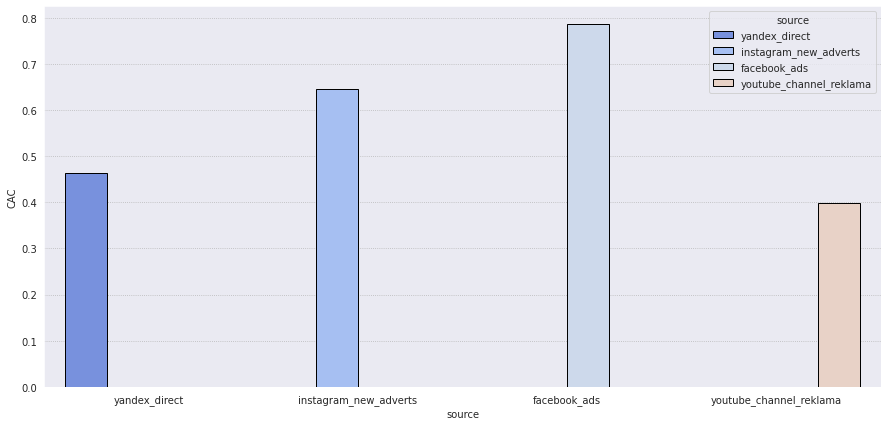

In [173]:
plt.figure(figsize=(15, 7))
sns.barplot(x='source', y='CAC', hue='source', data=_final_, ec='black');


<div class="alert alert-info"> <b>Комментарий студента:</b> Наверное, так будет правильнее.</div>

**Промежуточный вывод:** В ходе расчетов CAC самыми дорогими каналами по привлечению оказались **facebook** и **instagram**. На данный момент, самыми выгодными источниками можно считать **yandex** и **youtube**.

Средний CAC по проекту составляет 0.57.

In [91]:
_actions_game = game_actions.copy()

In [92]:
_source_for_dau = source.copy()

In [93]:
_source_and_actions = pd.merge(_actions_game, _source_for_dau, on='user_id')

In [94]:
_source_and_actions['day'] = _source_and_actions['event_datetime'].dt.date

In [95]:
_source_and_actions

,event_datetime,event,building_type,user_id,project_type,source,day
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-05
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-05
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-05
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-06
...,...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,facebook_ads,2020-05-13
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,facebook_ads,2020-05-18
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,youtube_channel_reklama,2020-05-10
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,youtube_channel_reklama,2020-05-13


In [96]:
___piv = _source_and_actions.pivot_table(index='day', columns='source', values='user_id', aggfunc='nunique')
___piv

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
day,,,,
2020-05-04,1184.0,1452.0,2078.0,1146.0
2020-05-05,1328.0,1539.0,2291.0,1224.0
2020-05-06,1389.0,1670.0,2445.0,1350.0
2020-05-07,1535.0,1802.0,2613.0,1434.0
2020-05-08,1583.0,1962.0,2784.0,1562.0
2020-05-09,1700.0,2077.0,2958.0,1659.0
2020-05-10,1860.0,2301.0,3271.0,1787.0
2020-05-11,1278.0,1432.0,2163.0,1122.0
2020-05-12,1153.0,1457.0,2030.0,1136.0


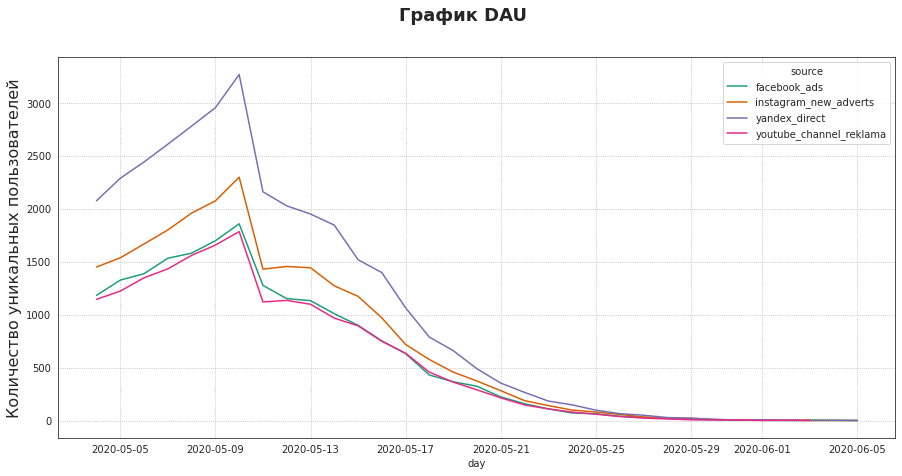

In [97]:
sns.set_palette('Dark2')
sns.set_style("white", {"grid.color": ".7", "grid.linestyle": ":"})
___piv.plot(figsize=(15, 7), grid=True)
plt.ylabel('Количество уникальных пользователей', fontsize=16)
plt.suptitle('График DAU', fontsize=18, fontweight='bold');

**Промежуточный вывод:** Из графика видно, что яндекс стабльно с первого дгя имеет больший показатель активных уникальных игроков в день.

In [98]:
_final_

,source,cost,user_id,CAC
0,yandex_direct,2233.11,4817,0.463589
1,instagram_new_adverts,2161.45,3347,0.645787
2,facebook_ads,2140.90,2726,0.785363
3,youtube_channel_reklama,1068.11,2686,0.397658


In [99]:
_building = game_actions.groupby('user_id', as_index=False)['building_type'].count().sort_values(
    by='building_type', ascending=False
)

In [100]:
_cost_b = ad_costs.groupby('source', as_index=False)['cost'].sum().sort_values(by='cost', ascending=False)

In [101]:
_building_b = pd.merge(_building, source, on='user_id')

In [102]:
_source_b = _building_b.groupby('source', as_index=False).agg({'user_id': 'nunique', 'building_type': 'sum'})

In [103]:
_source_b

,source,user_id,building_type
0,facebook_ads,2726,26131
1,instagram_new_adverts,3347,31815
2,yandex_direct,4817,45032
3,youtube_channel_reklama,2686,24978


In [104]:
_great_ = pd.merge(_source_b, _cost_b, on='source')

In [105]:
_great_['CAC'] = (_great_['cost'] / _great_['user_id']).round(3)

In [106]:
_great_ = _great_.sort_values(by='CAC', ascending=False)
_great_

,source,user_id,building_type,cost,CAC
0,facebook_ads,2726,26131,2140.90,0.785
1,instagram_new_adverts,3347,31815,2161.45,0.646
2,yandex_direct,4817,45032,2233.11,0.464
3,youtube_channel_reklama,2686,24978,1068.11,0.398


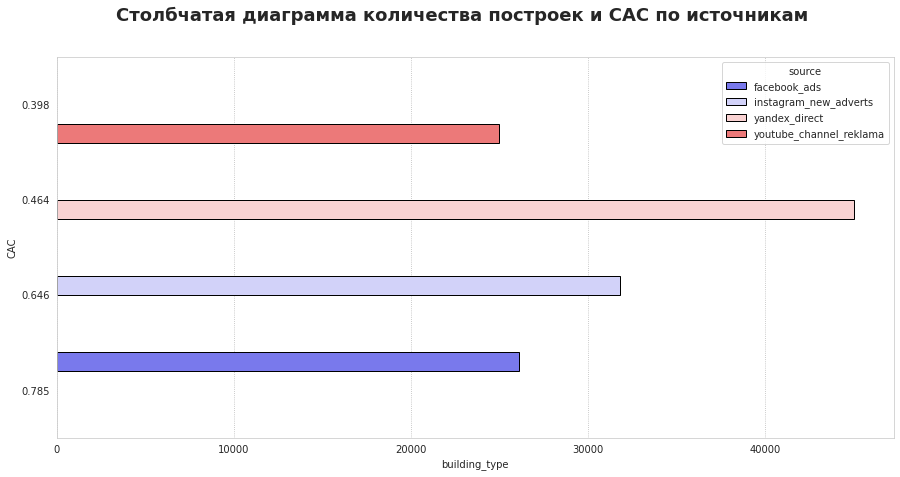

In [107]:
plt.figure(figsize=(15, 7))
ax = sns.set_palette('bwr', 4)
sns.set_style("whitegrid", {"grid.color": ".7", "grid.linestyle": ":"})
sns.barplot(x='building_type', y='CAC', hue='source', data=_great_, ec='black', orient='h');
plt.suptitle('Столбчатая диаграмма количества построек и CAC по источникам', fontsize=18, fontweight='bold');

**Промежуточный вывод:** По результатам исследования можно установить:

**yandex_direct** является самым выгодным источником. Игроки из данного источника имеют самое большое число построек, так же этот источник привлек самое большое количество игроков. Можно сказать, что у яндекса лучшие показатели DAU, то есть он обладает стабильно большим количеством уникальных активных пользователей в день. Стоит подчеркнуть, что яндекс второй по наименьшему показателю CAC.

В качестве дополнительного источника стоит рассмотреть **yputube**. Канал не имеет высоких показателй, однако CAC самы низкий. В совокупности с яндексом могут получиться хорошие результаты.

## Проверка  статистических гипотез

**Время завершения уровня различается в зависимости способа прохождения:**

через реализацию проекта,

через победу над первым игроком.

***H0*** - Время завершения уровня одинаково
***H1*** - Время завершения уровня различно.

Чтобы сравнивать время, нам необходимо получить данные о завершении первого уровня.

### Подготовка данных

In [108]:
_finished_stage = game_actions.groupby('user_id').filter(
    lambda x: ('building' in x['event'].values) and ('finished_stage_1' in x['event'].values) and ('project' not in x['event'].values)
)

In [109]:
_finished_stage

,event_datetime,event,building_type,user_id,project_type
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
11,2020-05-04 00:02:24,building,assembly_shop,9c200ece-3b74-44c4-8a3f-260f2486c5d7,NaN
15,2020-05-04 00:03:10,building,assembly_shop,02bf92c2-17a0-4156-be88-2054fb6b7421,NaN
...,...,...,...,...,...
135634,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [110]:
_project = game_actions.groupby('user_id').filter(
    lambda x: ('building' in x['event'].values) and ('project' in x['event'].values)
)


In [111]:
_project

,event_datetime,event,building_type,user_id,project_type
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN
13,2020-05-04 00:02:56,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN
20,2020-05-04 00:03:46,building,assembly_shop,b374304d-2f74-4cc1-a4e2-500da44a06c7,NaN
...,...,...,...,...,...
135620,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN
135627,2020-06-04 05:18:54,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135629,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN
135630,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly


In [112]:
_finished_time = _finished_stage.groupby('user_id').agg({'event_datetime' : ['first', 'last']}).reset_index()

In [113]:
_finished_time.columns= ['user_id', 'first', 'last']

In [114]:
_finished_time

,user_id,first,last
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39
...,...,...,...
3946,ffc6f4fa-3476-47af-85cb-e2ee0551110a,2020-05-04 03:59:12,2020-05-15 12:18:42
3947,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-06 06:34:18,2020-05-19 04:03:24
3948,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-04 17:46:05,2020-05-18 02:03:36
3949,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54


In [115]:
_finished_time['time_of_level'] = _finished_time['last'] - _finished_time['first']
_finished_time

,user_id,first,last,time_of_level
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,11 days 07:26:32
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,6 days 01:58:52
...,...,...,...,...
3946,ffc6f4fa-3476-47af-85cb-e2ee0551110a,2020-05-04 03:59:12,2020-05-15 12:18:42,11 days 08:19:30
3947,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-06 06:34:18,2020-05-19 04:03:24,12 days 21:29:06
3948,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-04 17:46:05,2020-05-18 02:03:36,13 days 08:17:31
3949,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,7 days 20:16:55


In [116]:
_finished_time['time_of_level'] = _finished_time['time_of_level'].dt.total_seconds() / 3600

In [117]:
_finished_time = _finished_time.rename(columns={'time_of_level': 'time_of_level_hours'})

In [118]:
_finished_time['time_of_level_hours'] = _finished_time['time_of_level_hours'].astype('int')


In [119]:
_finished_time

,user_id,first,last,time_of_level_hours
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,154
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,301
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,306
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,271
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,145
...,...,...,...,...
3946,ffc6f4fa-3476-47af-85cb-e2ee0551110a,2020-05-04 03:59:12,2020-05-15 12:18:42,272
3947,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-06 06:34:18,2020-05-19 04:03:24,309
3948,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-04 17:46:05,2020-05-18 02:03:36,320
3949,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,188


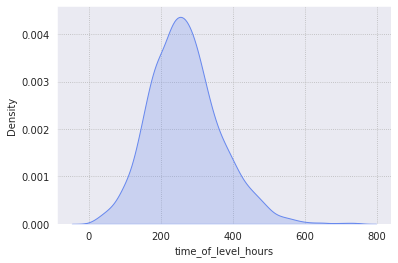

In [120]:
sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
sns.kdeplot(_finished_time['time_of_level_hours'], shade=True, color=sns.set_palette('coolwarm'));

In [121]:
_project_time = _project.groupby('user_id').agg({'event_datetime' : ['first', 'last']}).reset_index()

In [122]:
_project_time.columns= ['user_id', 'first', 'last']

In [123]:
_project_time

,user_id,first,last
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04 16:43:39,2020-05-16 11:22:33
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08 21:57:44,2020-05-24 19:05:12
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07 10:26:09,2020-05-27 11:38:47
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04 07:48:50,2020-05-18 09:34:10
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05 15:49:57,2020-05-20 09:35:04
...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04 09:09:43,2020-05-23 16:59:43
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05 01:03:38,2020-05-13 00:02:51
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04 06:39:58,2020-05-18 22:50:51
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05 06:05:51,2020-05-16 00:28:59


In [124]:
_project_time['time_of_level'] = _project_time['last'] - _project_time['first']

In [125]:
_project_time['time_of_level'] = _project_time['time_of_level'].dt.total_seconds() / 3600

In [126]:
_project_time = _project_time.rename(columns={'time_of_level': 'time_of_level_hours'})

In [127]:
_project_time['time_of_level_hours'] = _project_time['time_of_level_hours'].astype('int')

In [128]:
_project_time

,user_id,first,last,time_of_level_hours
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04 16:43:39,2020-05-16 11:22:33,282
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08 21:57:44,2020-05-24 19:05:12,381
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07 10:26:09,2020-05-27 11:38:47,481
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04 07:48:50,2020-05-18 09:34:10,337
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05 15:49:57,2020-05-20 09:35:04,353
...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04 09:09:43,2020-05-23 16:59:43,463
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05 01:03:38,2020-05-13 00:02:51,190
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04 06:39:58,2020-05-18 22:50:51,352
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05 06:05:51,2020-05-16 00:28:59,258


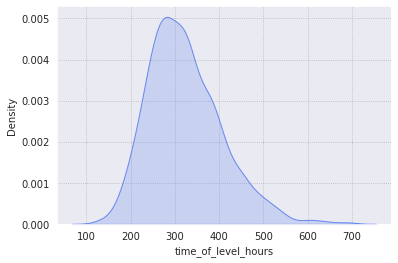

In [129]:
sns.kdeplot(_project_time['time_of_level_hours'], shade=True);

In [130]:
_stage_ = _finished_time['time_of_level_hours']
_project_ = _project_time['time_of_level_hours']

In [131]:
_stage_.mean()

266.0106302201974

In [132]:
_project_.mean()

322.513397642015

In [133]:
_stage_.median()

259.0

In [134]:
_project_.median()

312.0

### Проведение теста

In [135]:
np.std(_stage_)

98.28060379670593

In [136]:
np.std(_project_)

84.1662602212092

In [137]:
stat, p_value = levene(_stage_, _project_)

if p_value < 0.05:
    print("Дисперсии выборок статистически значимо различаются.")
else:
    print("Дисперсии выборок не различаются значимо.")

Дисперсии выборок статистически значимо различаются.


In [138]:
d1 = np.var(_stage_)
d2 = np.var(_project_)

if d1 > d2:
    print("Выборка d1 имеет большую дисперсию.")
else:
    print("Выборка d2 имеет большую дисперсию.")

Выборка d1 имеет большую дисперсию.


In [139]:
results = st.ttest_ind(_stage_, _project_, equal_var=False)
alpha = 0.05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 5.951843305502365e-107
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Статистический тест показал, что время завершение ралично. В данных есть статистически значимая разница.

## Проверка авторской гипотезы

Среднее время, затраченное пользователями на завершение первого уровня, не зависит от типа источника, с которого пришли пользователи.

**Нулевая гипотеза (H0)**: Средние значения времени завершения первого уровня для двух групп пользователей (из разных источников трафика) равны.

**Альтернативная гипотеза (H1)**: Средние значения времени завершения первого уровня для двух групп пользователей различаются.

### Подготовка данных

In [140]:
game_actions

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [141]:
source

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [142]:
source_user = pd.merge(game_actions, source, on='user_id', how='left')

In [143]:
source_user

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct
...,...,...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,instagram_new_adverts
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,yandex_direct
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,youtube_channel_reklama
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,facebook_ads


In [144]:
source_user['source'].value_counts()

yandex_direct              47694
instagram_new_adverts      33757
facebook_ads               27672
youtube_channel_reklama    26516
Name: source, dtype: int64

In [145]:
yandex_direct = source_user[source_user['source'] == 'yandex_direct']
yandex_direct

,event_datetime,event,building_type,user_id,project_type,source
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN,yandex_direct
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN,yandex_direct
10,2020-05-04 00:01:59,building,assembly_shop,c99ecd61-1a4e-4bd2-b8b5-1f8bbcd2bdb5,NaN,yandex_direct
14,2020-05-04 00:03:03,building,assembly_shop,ab09a4ab-4d28-4dda-81c4-b93d3ea3e480,NaN,yandex_direct
...,...,...,...,...,...,...
135624,2020-06-04 01:30:46,building,spaceport,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,yandex_direct
135627,2020-06-04 06:44:02,finished_stage_1,NaN,18fc6a86-00e7-4f3e-96da-bdb6d550415c,NaN,yandex_direct
135631,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,yandex_direct
135633,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,yandex_direct


In [146]:
instagram = source_user[source_user['source'] == 'instagram_new_adverts']
instagram

,event_datetime,event,building_type,user_id,project_type,source
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN,instagram_new_adverts
13,2020-05-04 00:02:56,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN,instagram_new_adverts
17,2020-05-04 00:03:26,building,assembly_shop,58abbcb4-07d2-4f9a-affc-93c2ca48bb65,NaN,instagram_new_adverts
22,2020-05-04 00:03:59,building,assembly_shop,445a5662-dfe2-43a8-9835-2ece9b6e1bf5,NaN,instagram_new_adverts
...,...,...,...,...,...,...
135610,2020-06-02 20:53:20,finished_stage_1,NaN,9df154c3-fb77-4f8a-a281-0457c0b11cec,NaN,instagram_new_adverts
135620,2020-06-03 16:34:56,building,research_center,a140e0d5-434a-4c7a-ab96-c364afcc646b,NaN,instagram_new_adverts
135625,2020-06-04 05:12:50,finished_stage_1,NaN,a140e0d5-434a-4c7a-ab96-c364afcc646b,NaN,instagram_new_adverts
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,instagram_new_adverts


In [147]:
facebook_ads = source_user[source_user['source'] == 'facebook_ads']
facebook_ads

,event_datetime,event,building_type,user_id,project_type,source
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,facebook_ads
11,2020-05-04 00:02:24,building,assembly_shop,9c200ece-3b74-44c4-8a3f-260f2486c5d7,NaN,facebook_ads
12,2020-05-04 00:02:36,building,assembly_shop,09714d4f-67d1-44a4-b275-3627f3f386aa,NaN,facebook_ads
...,...,...,...,...,...,...
135628,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN,facebook_ads
135629,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly,facebook_ads
135630,2020-06-04 13:26:25,building,research_center,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,facebook_ads
135632,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,facebook_ads


In [148]:
youtube = source_user[source_user['source'] == 'youtube_channel_reklama']
youtube

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN,youtube_channel_reklama
25,2020-05-04 00:04:47,building,assembly_shop,7e7d2d26-156e-4fd6-aebf-4df91181c9a4,NaN,youtube_channel_reklama
31,2020-05-04 00:06:16,building,assembly_shop,5c061bf9-92bb-4ec5-b01a-e648dc10a9c1,NaN,youtube_channel_reklama
47,2020-05-04 00:09:06,building,assembly_shop,3408cb40-45d7-4bd8-97d8-96fe0673496c,NaN,youtube_channel_reklama
...,...,...,...,...,...,...
135611,2020-06-02 21:37:17,building,spaceport,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,youtube_channel_reklama
135615,2020-06-03 08:55:15,building,spaceport,5be9122e-a532-4c29-8195-c64e59f9f394,NaN,youtube_channel_reklama
135619,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN,youtube_channel_reklama
135621,2020-06-03 17:00:33,finished_stage_1,NaN,5be9122e-a532-4c29-8195-c64e59f9f394,NaN,youtube_channel_reklama


In [149]:
# Функция func берет на вход датафрей и формирует даафрейм с четырьмя полями - айди пользователя, дата начала уровня
# и дата завершения уровня в часах
def func(df):
    df = df.groupby('user_id').agg({'event_datetime' : ['first', 'last']}).reset_index()
    df.columns=['user_id', 'first', 'last']
    df['time_of_level'] = df['last'] - df['first']
    df['time_of_level'] = df['time_of_level'].dt.total_seconds() / 3600
    df = df.rename(columns={'time_of_level': 'time_of_level_hours'})
    df['time_of_level_hours'] = df['time_of_level_hours'].astype('int')
    return df

In [150]:
yandex1 = func(yandex_direct)

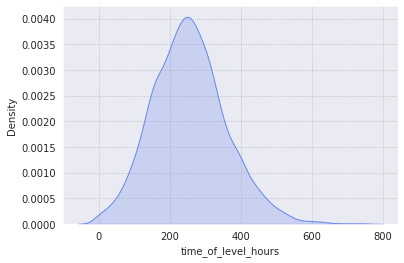

In [151]:
sns.kdeplot(yandex1['time_of_level_hours'], shade=True);

In [152]:
instagram1 = func(instagram)

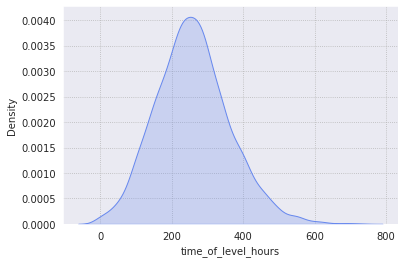

In [153]:
sns.kdeplot(instagram1['time_of_level_hours'], shade=True);

In [154]:
facebook1 = func(facebook_ads)

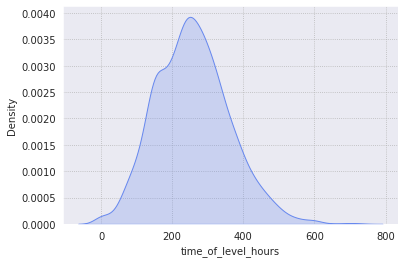

In [155]:
sns.kdeplot(facebook1['time_of_level_hours'], shade=True);

In [156]:
youtube1 = func(youtube)

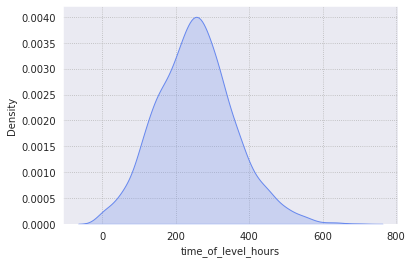

In [157]:
sns.kdeplot(youtube1['time_of_level_hours'], shade=True);

In [158]:
def viborka(df):
    return df['time_of_level_hours']
    

In [159]:
_yandex = viborka(yandex1)

In [160]:
_instagram = viborka(instagram1)

In [161]:
_facebook = viborka(facebook1)

In [162]:
_youtube = viborka(youtube1)

### Проведение теста

Так как гипотеза подразумевает под собой наличие множетсвенного сравнения, было принято решение воспользоваться поправкой Бонферрони. Всего будет проводится 6 сравнений. Поправка Бонферрони позволяет снизить вероятность появления ложноположительного результата при множественном тестировании гипотез. Критический уровень статистической значимости - 5 процентов.

In [163]:
# Функция для проведения t теста.
def t_test(df1, df2):
    results = st.ttest_ind(df1, df2, equal_var=False)
    alpha = 0.05
    bonferroni_alpha = alpha / 6

    print('p-value:', results.pvalue)

    if results.pvalue < bonferroni_alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [164]:
t_test(_yandex, _instagram)

p-value: 0.07661521032499667
Не получилось отвергнуть нулевую гипотезу


In [165]:
t_test(_yandex, _facebook)

p-value: 0.26720573137682463
Не получилось отвергнуть нулевую гипотезу


In [166]:
t_test(_yandex, _youtube)

p-value: 0.7868745862630966
Не получилось отвергнуть нулевую гипотезу


In [167]:
t_test(_facebook, _instagram)

p-value: 0.6095912936634867
Не получилось отвергнуть нулевую гипотезу


In [168]:
t_test(_facebook, _youtube)

p-value: 0.22489713325188448
Не получилось отвергнуть нулевую гипотезу


In [169]:
t_test(_instagram, _youtube)

p-value: 0.07485802969234671
Не получилось отвергнуть нулевую гипотезу


**Промежуточный вывод:** Врем прохождения уровня не зависит от источника. В данных нет статистически значимых различий

## Общий вывод

В процессе анализа были сравнивались 4 источника привлечения трафика - Yandex, Instagram, Facebook и Youtube. 

Yandex имеет показатели во всех сектора выше, чем у остальных источников и так же в совокупности со всеми факторами является самым выгодным. 

В качестве дополнительного источника стоит рассмотреть **youtube**.

Так же были проверены 2 статистические гипотезы, которые показали, что время прохождения уровня зависит от стратегии прохождения. Что касается прохождения уровня и источников, здесь нет никаких различий. Даанные не имеют статистически значимых отличий.